In [1066]:
#Instalar MLFLOW
#!pip install mlflow

In [1067]:
#Verificar si MLFLOW está instalado
!mlflow

Usage: mlflow [OPTIONS] COMMAND [ARGS]...

Options:
  --version  Show the version and exit.
  --help     Show this message and exit.

Commands:
  artifacts    Upload, list, and download artifacts from an MLflow...
  db           Commands for managing an MLflow tracking database.
  deployments  Deploy MLflow models to custom targets.
  doctor       Prints out useful information for debugging issues with MLflow.
  experiments  Manage experiments.
  gc           Permanently delete runs in the `deleted` lifecycle stage.
  models       Deploy MLflow models locally.
  recipes      Run MLflow Recipes and inspect recipe results.
  run          Run an MLflow project from the given URI.
  runs         Manage runs.
  sagemaker    Serve models on SageMaker.
  server       Run the MLflow tracking server.


In [1068]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

%matplotlib inline


In [1069]:
import mlflow
import mlflow.sklearn

mlflow.set_experiment('ToyotaCorolla')

<Experiment: artifact_location='file:///C:/Users/Justino/OneDrive/UTN-FRT/5%C2%B0%20A%C3%B1o/Datamining/ToyotaCorolla-Datamining/mlruns/915647037735961866', creation_time=1696207441550, experiment_id='915647037735961866', last_update_time=1696207441550, lifecycle_stage='active', name='ToyotaCorolla', tags={}>

In [1070]:
#Borrar anteriores registros en MLFlow

# Obtén el ID del experimento
experiment_id = mlflow.get_experiment_by_name('ToyotaCorolla').experiment_id

if experiment_id:
    runs = mlflow.search_runs(experiment_ids=[experiment_id])
    for run_id in runs.run_id:
        mlflow.delete_run(run_id)

# Análisis Exploratorio de Datos

Importar Dataset y ver dimensiones del dataset crudo

In [1071]:
file_name = 'ToyotaCorolla.csv'
df_raw = pd.read_csv(file_name, engine='python')

print(f'Dimensiones del dataset: {df_raw.shape}')

Dimensiones del dataset: (1436, 37)


Visualizar columnas del dataset

In [1072]:
df_raw.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')

Ver informacion y tipo de dato de cada columna

In [1073]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

Convertir los nombres de las columnas a minúscula

In [1074]:
df_raw.columns = df_raw.columns.str.lower()
df_raw.columns

Index(['id', 'model', 'price', 'age_08_04', 'mfg_month', 'mfg_year', 'km',
       'fuel_type', 'hp', 'met_color', 'automatic', 'cc', 'doors', 'cylinders',
       'gears', 'quarterly_tax', 'weight', 'mfr_guarantee', 'bovag_guarantee',
       'guarantee_period', 'abs', 'airbag_1', 'airbag_2', 'airco',
       'automatic_airco', 'boardcomputer', 'cd_player', 'central_lock',
       'powered_windows', 'power_steering', 'radio', 'mistlamps',
       'sport_model', 'backseat_divider', 'metallic_rim', 'radio_cassette',
       'tow_bar'],
      dtype='object')

Realizar un analisis inicial de la descripción de los datos del dataset

In [1075]:
df_raw.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,1436.0,NaN,NaN,NaN,721.555014,416.47689,1.0,361.75,721.5,1081.25,1442.0
model,1436,372,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,1436.0,NaN,NaN,NaN,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.0,32500.0
age_08_04,1436.0,NaN,NaN,NaN,55.947075,18.599988,1.0,44.0,61.0,70.0,80.0
mfg_month,1436.0,NaN,NaN,NaN,5.548747,3.354085,1.0,3.0,5.0,8.0,12.0
mfg_year,1436.0,NaN,NaN,NaN,1999.625348,1.540722,1998.0,1998.0,1999.0,2001.0,2004.0
km,1436.0,NaN,NaN,NaN,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
fuel_type,1436,3,Petrol,1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hp,1436.0,NaN,NaN,NaN,101.502089,14.98108,69.0,90.0,110.0,110.0,192.0
met_color,1436.0,NaN,NaN,NaN,0.674791,0.468616,0.0,0.0,1.0,1.0,1.0


Vamos a eliminar 5 columnas del dataset inicial:

- **Id:** Eliminamos id porque no aporta nada al modelo.
- **Model:** Entendemos que esta variable ya fue trabajada y las demas columnas contienen la información de esta asi que decidimos eliminarla.
- **Cylinders:** Esta variable presenta una desviación estandar de 0.0, esto indica que poseé el mismo valor para todas las observaciones asi que no aporta al modelo tenerla.

In [1076]:
columns_to_delete = ['id', 'model', 'cylinders']
df = df_raw.drop(columns=columns_to_delete, axis=1)
df = pd.DataFrame(df)

Verificamos que efectivamente hayan sido eliminadas las columnas

In [1077]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             1436 non-null   int64 
 1   age_08_04         1436 non-null   int64 
 2   mfg_month         1436 non-null   int64 
 3   mfg_year          1436 non-null   int64 
 4   km                1436 non-null   int64 
 5   fuel_type         1436 non-null   object
 6   hp                1436 non-null   int64 
 7   met_color         1436 non-null   int64 
 8   automatic         1436 non-null   int64 
 9   cc                1436 non-null   int64 
 10  doors             1436 non-null   int64 
 11  gears             1436 non-null   int64 
 12  quarterly_tax     1436 non-null   int64 
 13  weight            1436 non-null   int64 
 14  mfr_guarantee     1436 non-null   int64 
 15  bovag_guarantee   1436 non-null   int64 
 16  guarantee_period  1436 non-null   int64 
 17  abs           

### Búsqueda de valores nulos y duplicados

In [1078]:
df.isnull().sum()

price               0
age_08_04           0
mfg_month           0
mfg_year            0
km                  0
fuel_type           0
hp                  0
met_color           0
automatic           0
cc                  0
doors               0
gears               0
quarterly_tax       0
weight              0
mfr_guarantee       0
bovag_guarantee     0
guarantee_period    0
abs                 0
airbag_1            0
airbag_2            0
airco               0
automatic_airco     0
boardcomputer       0
cd_player           0
central_lock        0
powered_windows     0
power_steering      0
radio               0
mistlamps           0
sport_model         0
backseat_divider    0
metallic_rim        0
radio_cassette      0
tow_bar             0
dtype: int64

In [1079]:
df[df.duplicated()]

,price,age_08_04,mfg_month,mfg_year,km,fuel_type,hp,met_color,automatic,cc,...,central_lock,powered_windows,power_steering,radio,mistlamps,sport_model,backseat_divider,metallic_rim,radio_cassette,tow_bar
113,24950,8,1,2004,13253,Diesel,116,1,0,2000,...,1,1,1,0,0,0,0,0,0,0


Dado que solo hay un registro duplicado el mismo no presenta un inconveniente para el modelo y decidimos conservarlo.

### Visualización de datos

Visualización de variables categoricas

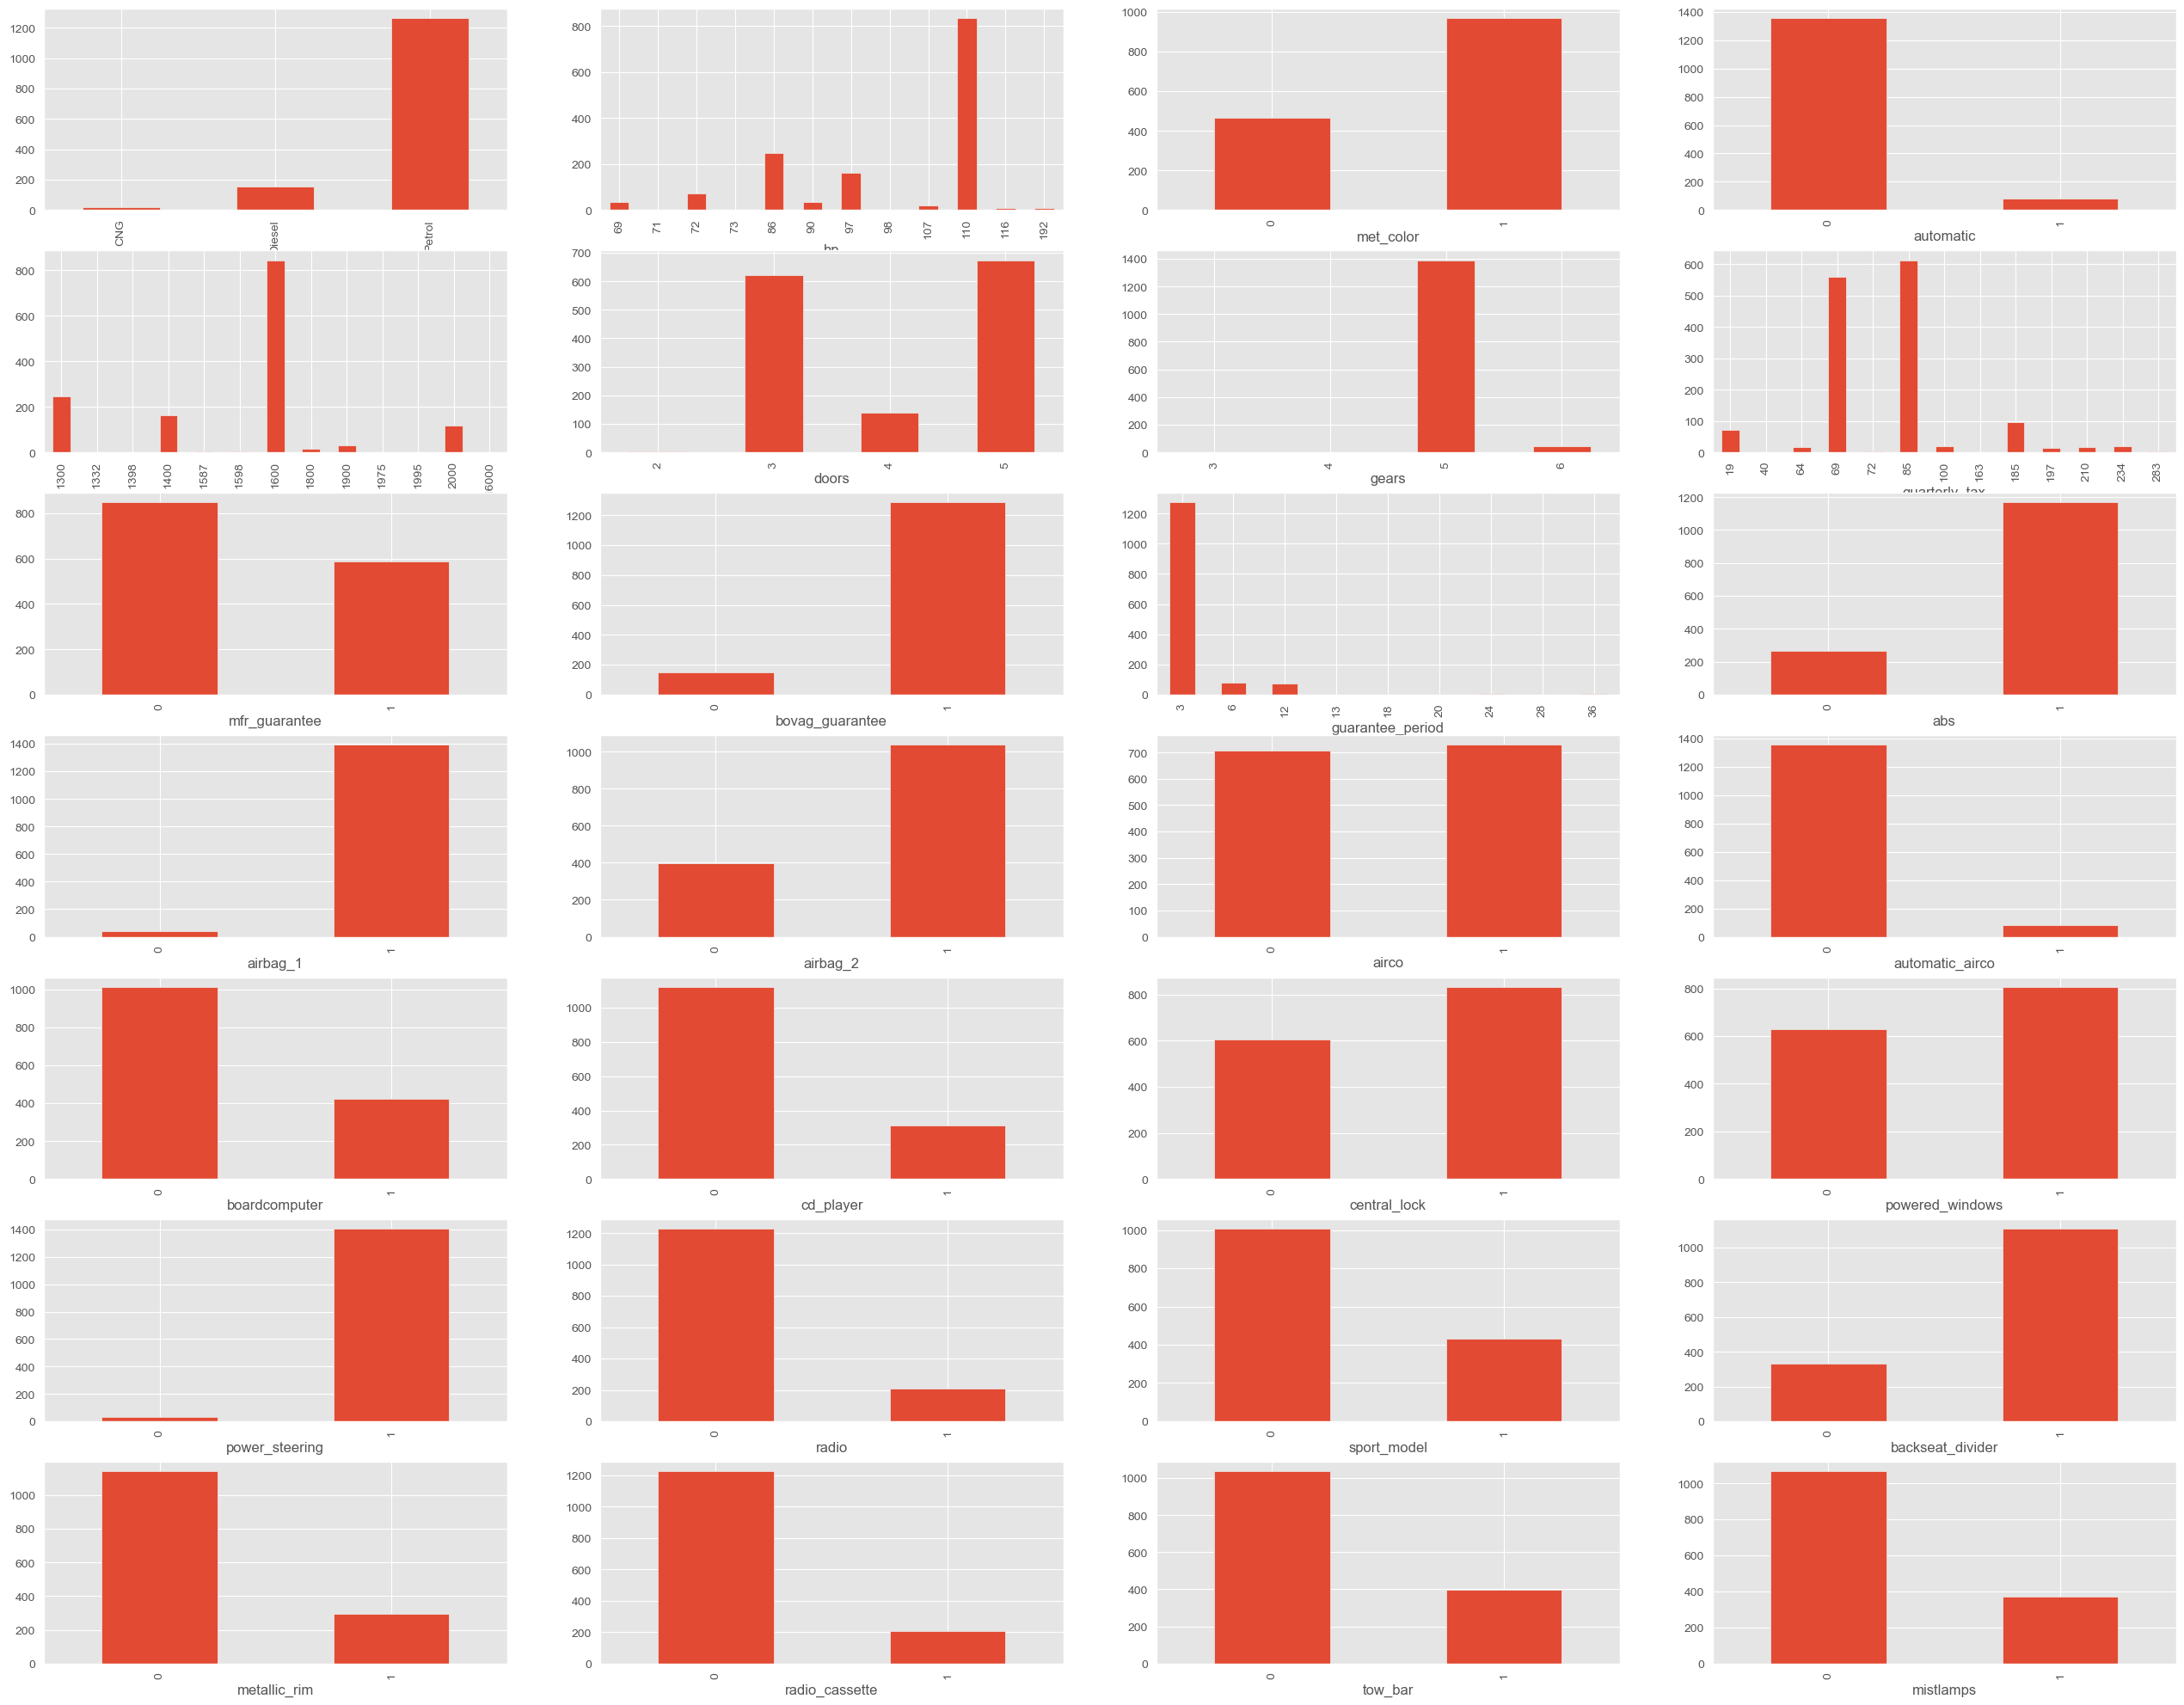

In [1080]:
variables_categoricas = ['fuel_type', 'hp', 'met_color', 'automatic', 'cc', 'doors', 'gears',
                         'quarterly_tax', 'mfr_guarantee', 'bovag_guarantee', 'guarantee_period', 'abs', 'airbag_1',
                         'airbag_2' , 'airco', 'automatic_airco', 'boardcomputer', 'cd_player', 'central_lock',
                         'powered_windows', 'power_steering', 'radio', 'sport_model', 'backseat_divider',
                         'metallic_rim', 'radio_cassette', 'tow_bar', 'mistlamps']

fig = plt.figure(figsize=(32,25))

for i in range(len(variables_categoricas)):
  continuos = variables_categoricas[i]

  ax1 = fig.add_subplot(7,4,i+1)
  ax1.set_xlabel(continuos)

  df.groupby(continuos).size().plot(kind='bar')

Visualización de variables continuas

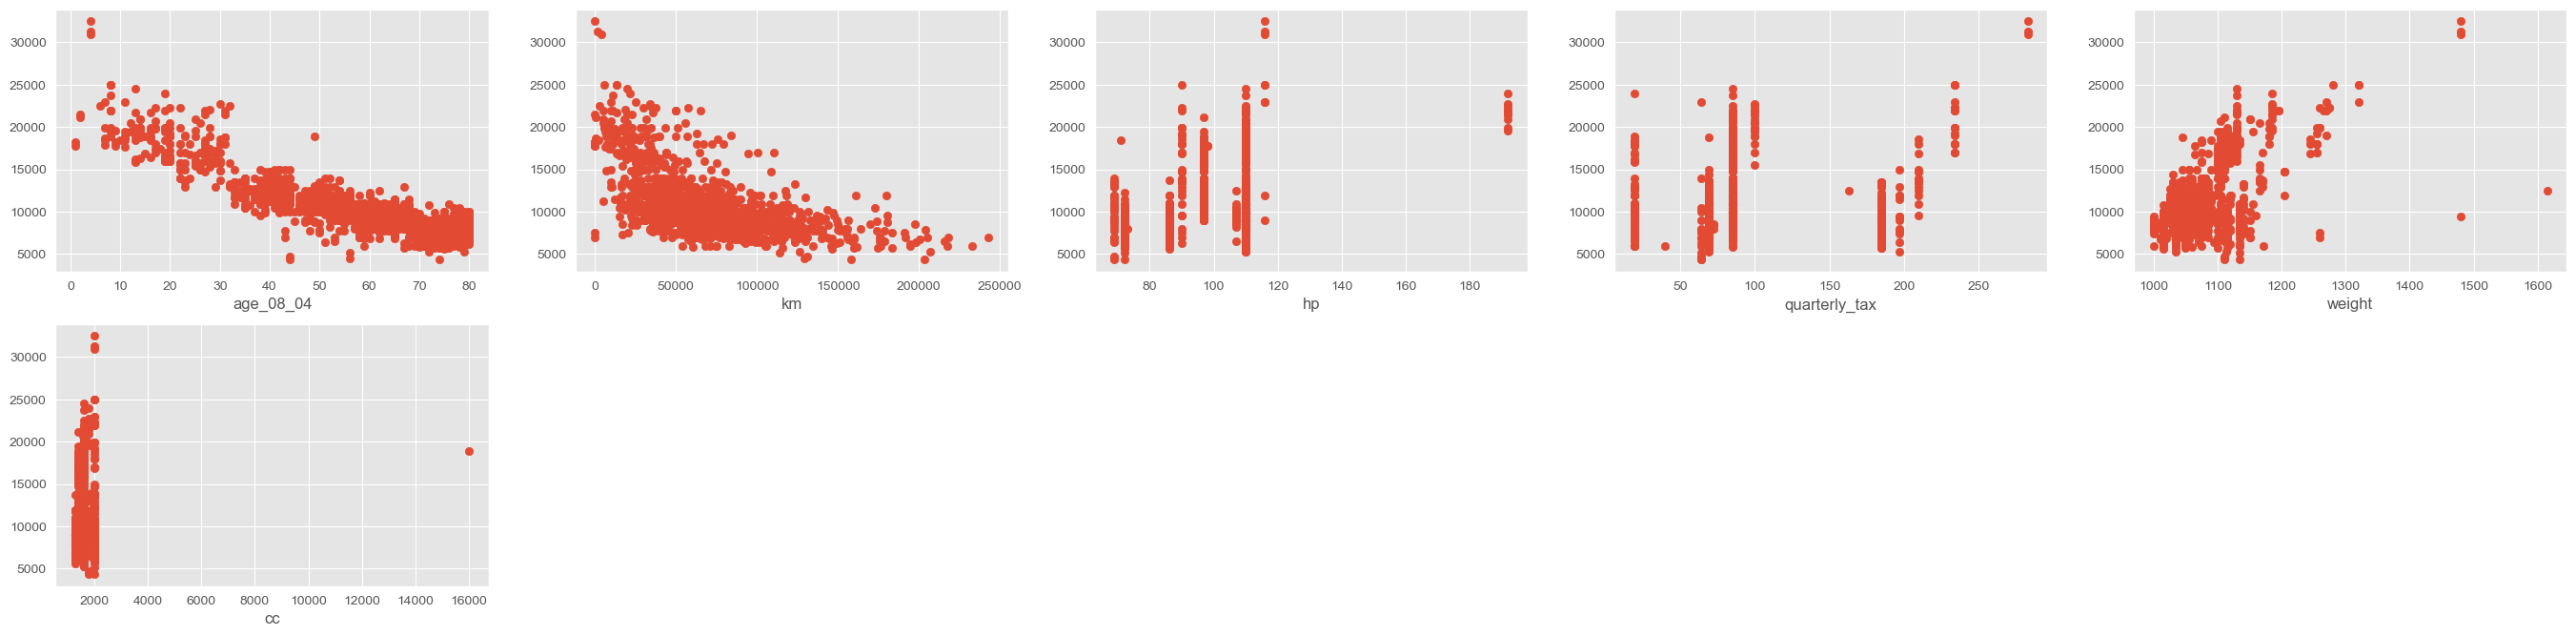

In [1081]:
variables_continuas_scatter = ['age_08_04','km','hp','quarterly_tax','weight','cc']

fig = plt.figure(figsize=(34,25))

for i in range(len(variables_continuas_scatter)):
    aux = variables_continuas_scatter[i]

    ax1 = fig.add_subplot(6,5,i+1)
    ax1.set_xlabel(aux)

    plt.scatter(df[aux],df.price)

Podemos observar como las variables hp, quartely_tax no son continuas, es decir son discretas.
Sin embargo podemos observar que la variable cc a primera vista parece continua, pero esto se debe a las proporciones del eje x (debido al outlier), en la gráfica anterior se puede observar como cc es un valor discreto y no continuo

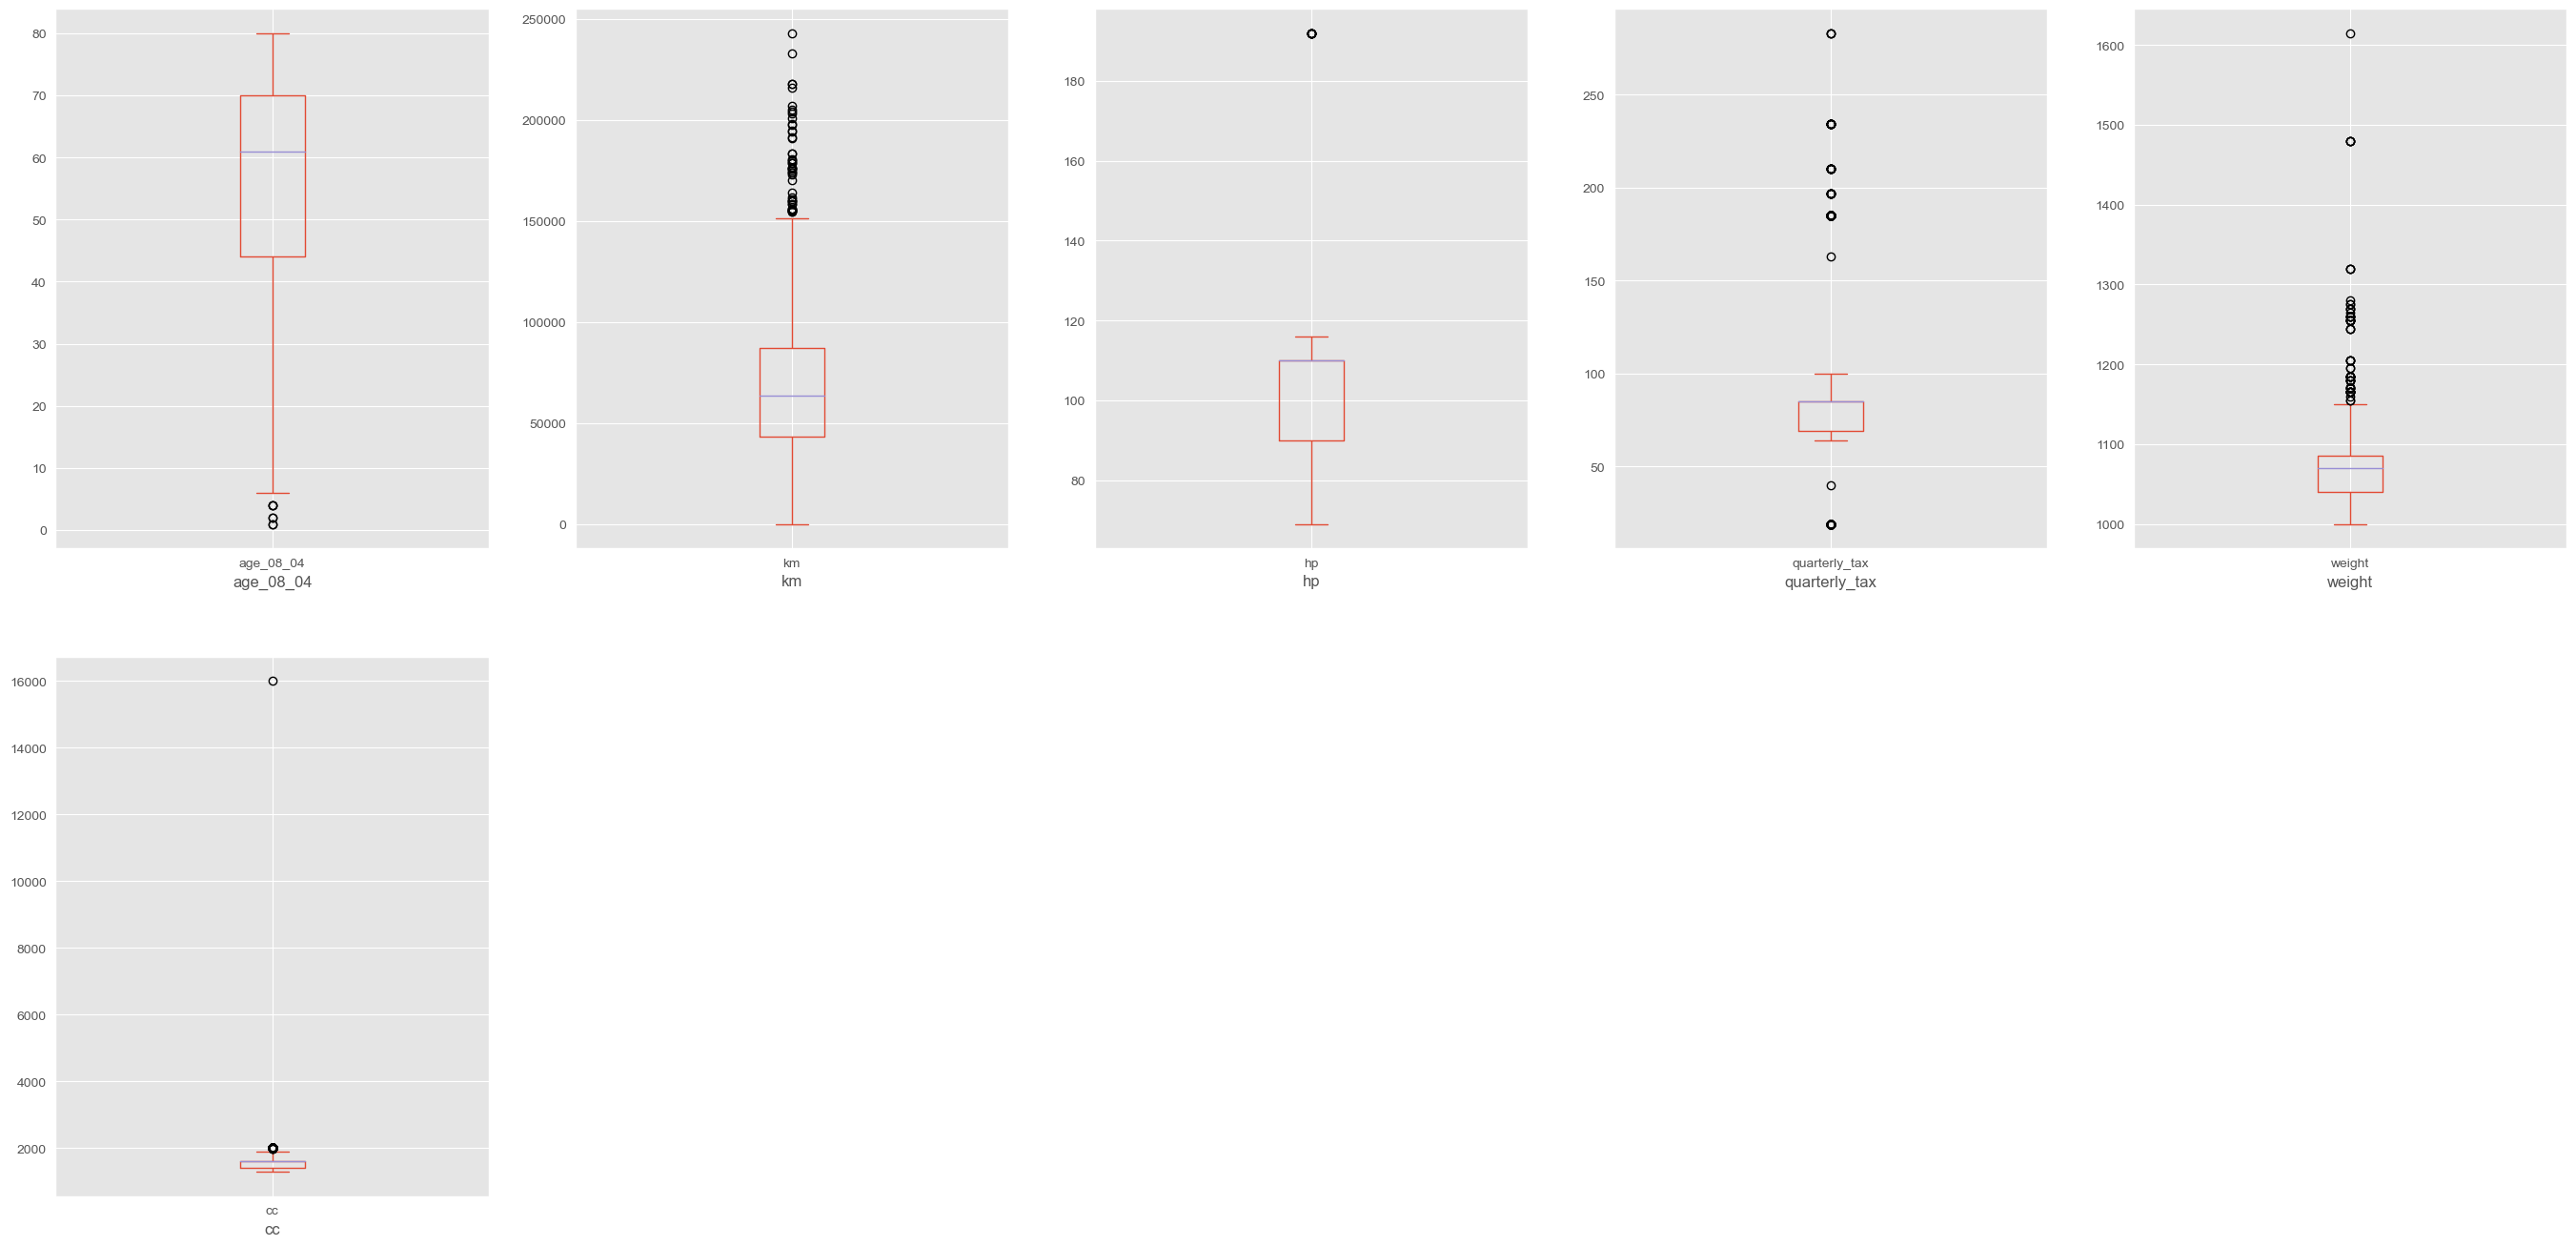

In [1082]:
variables_continuas = ['age_08_04','km','hp','quarterly_tax','weight','cc']
fig = plt.figure(figsize=(34,25))

for i in range(len(variables_continuas)):
    continuos = variables_continuas[i]

    ax1 = fig.add_subplot(3,5,i+1)
    ax1.set_xlabel(continuos)

    df_raw[continuos].plot(kind='box')

Realizamos la transformacion dummie de la variable fuel_type

In [1083]:
dummies = pd.get_dummies(data=df, columns=['fuel_type'], drop_first=True, prefix="ft_", dtype=int) #convierto la variable categorica Fuel_type en variables booleanas
df = dummies

Visualización de la variable objetivo

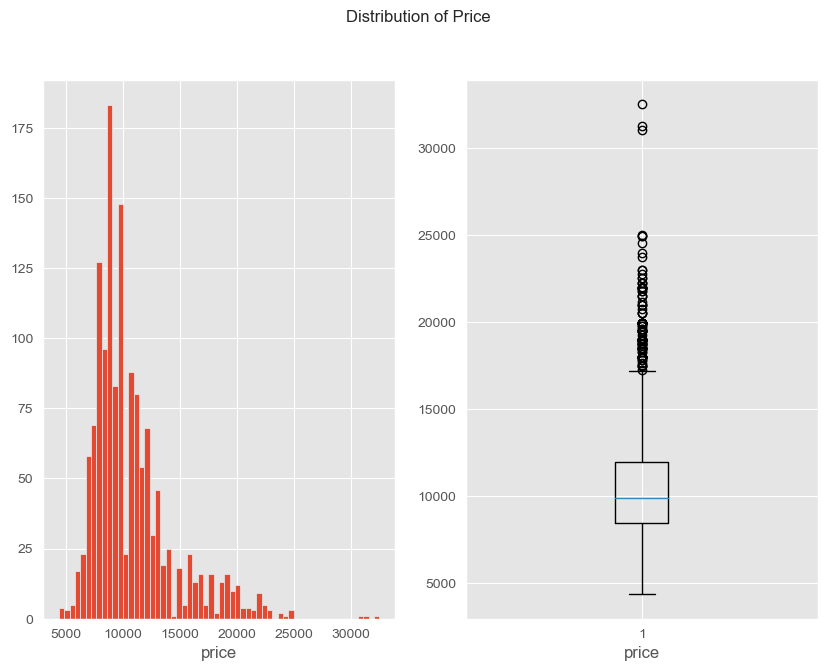

In [1084]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
fig.suptitle("Distribution of Price")
ax1.hist(df.price, bins=60)
ax1.set_xlabel(df.price.name)

ax2.boxplot(df.price)
ax2.set_xlabel(df.price.name)

plt.show()

#En esta ocasión se configura el parámetro bins en 60, el cual por defecto es 10, y representa el número de contenedores que serán representados en el histograma.

Se puede observar que el histograma presenta una forma similar a una distribución normal, pero con un alargamiento hacía la derecha.
Esta distribución presenta un sesgo positivo (o a la derecha), en donde la media tendrá un valor mayor que la mediana, y la mediana tendrá un valor mayor que la moda.

Dividimos el dataset en datos de entrenamiento y test

In [1085]:
split_param = {
    'test_size' :0.4,
    'random_state': 42,
    'shuffle': True
}

x_train, x_test, y_train, y_test = train_test_split(df.drop(['price'], axis=1), df.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((861, 34), (575, 34), (861,), (575,))

In [1086]:
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     273.3
Date:                Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:01:35   Log-Likelihood:                -7222.8
No. Observations:                 861   AIC:                         1.451e+04
Df Residuals:                     827   BIC:                         1.468e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0098      0.001  

In [1087]:
#Calculamos RMSE (error cuadratico medio)
y_pred = model.predict(sm.add_constant(x_test))
RMSE = mean_squared_error(y_test,y_pred, squared = 'false')

In [1088]:
dw = round(sm.stats.stattools.durbin_watson(model.resid), 3)
kurtosis = model.resid.kurtosis()
skew = model.resid.skew()
f_statistic = model.fvalue

In [1089]:
with mlflow.start_run(run_name="Todas las variables y todos los registros"):
    #mlflow.log_metric("accuracy", accuracy)
    mlflow.log_params({"R2": model.rsquared, "R2-Ajustado": model.rsquared_adj, "Skew": skew, "Kurtosis": kurtosis, "Durbin-Watson": dw, "MSE - RMSE": RMSE, "F_Statistic": f_statistic})
    mlflow.sklearn.log_model(model, "modelo 1")

### Vamos a probar diferentes puntos de corte en la normalización del precio y ejecutar el modelo para ver cual nos resulta conveniente para seguir trabajando

Ahora buscaremos el valor máximo a partir del cual la variable objetivo (precio) deja de caer dentro del extremo superior del diagrama de caja-bigotes (boxplots)

Valor máximo: 17847.5


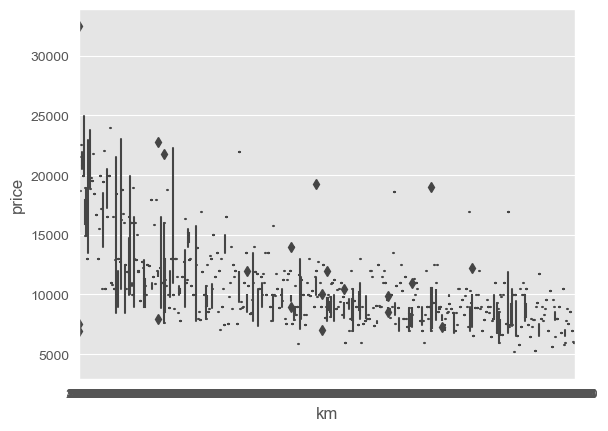

In [1090]:
sns.boxplot(x="km", y="price", data=df)
max_value = plt.gca().lines[4].get_ydata().max()
print("Valor máximo:", max_value)

In [1091]:
registros_mayores = (df['price'] > max_value).sum()

# Imprimir el número de registros mayores al valor umbral
print("Número de registros mayores a", max_value, ":", registros_mayores)

Número de registros mayores a 17847.5 : 102


Eliminar registros con precios mayores a 24000 para eliminar los outliers mas lejanos

In [1092]:
df24 = df[df['price'] <= 24000]

In [1093]:
x_train, x_test, y_train, y_test = train_test_split(df24.drop(['price'], axis=1), df24.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((857, 34), (572, 34), (857,), (572,))

Primera ejecución de una regresión con todas las variables y con registros de precios <=24000

In [1094]:
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     240.0
Date:                Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:02:02   Log-Likelihood:                -7211.3
No. Observations:                 857   AIC:                         1.449e+04
Df Residuals:                     823   BIC:                         1.465e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0077      0.001  

In [1095]:
#Calculamos RMSE (error cuadratico medio)
y_pred = model.predict(sm.add_constant(x_test))
RMSE = mean_squared_error(y_test,y_pred, squared = 'false')

In [1096]:
dw = round(sm.stats.stattools.durbin_watson(model.resid), 3)
kurtosis = model.resid.kurtosis()
skew = model.resid.skew()
f_statistic = model.fvalue

In [1097]:
with mlflow.start_run(run_name="Todas las variables y precios <=24000"):
  #mlflow.log_metric("accuracy", accuracy)
  mlflow.log_params({"R2": model.rsquared, "R2-Ajustado": model.rsquared_adj, "Skew": skew, "Kurtosis": kurtosis, "Durbin-Watson": dw, "MSE - RMSE": RMSE, "F_Statistic": f_statistic})
  mlflow.sklearn.log_model(model, "modelo 1")

Eliminar registros con precios mayores a 20000

In [1098]:
df20 = df[df['price'] <= 20000]

In [1099]:
x_train, x_test, y_train, y_test = train_test_split(df20.drop(['price'], axis=1), df20.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((839, 34), (560, 34), (839,), (560,))

In [1100]:
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     220.0
Date:                Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:02:05   Log-Likelihood:                -6974.4
No. Observations:                 839   AIC:                         1.402e+04
Df Residuals:                     805   BIC:                         1.418e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0090      0.001  

In [1101]:
#Calculamos RMSE (error cuadratico medio)
y_pred = model.predict(sm.add_constant(x_test))
RMSE = mean_squared_error(y_test,y_pred, squared = 'false')

In [1102]:
dw = round(sm.stats.stattools.durbin_watson(model.resid), 3)
kurtosis = model.resid.kurtosis()
skew = model.resid.skew()
f_statistic = model.fvalue

In [1103]:
with mlflow.start_run(run_name="Todas las variables y precios <=20000"):
    #mlflow.log_metric("accuracy", accuracy)
    mlflow.log_params({"R2": model.rsquared, "R2-Ajustado": model.rsquared_adj, "Skew": skew, "Kurtosis": kurtosis, "Durbin-Watson": dw, "MSE - RMSE": RMSE,"F_Statistic": f_statistic})
    mlflow.sklearn.log_model(model, "modelo 1")

Eliminar registros con precios mayores a 17847.5

In [1104]:
df17 = df[df['price'] <= 17847.5]

In [1105]:
x_train, x_test, y_train, y_test = train_test_split(df17.drop(['price'], axis=1), df17.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 34), (534, 34), (800,), (534,))

In [1106]:
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.5
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          4.60e-293
Time:                        21:02:09   Log-Likelihood:                -6614.4
No. Observations:                 800   AIC:                         1.330e+04
Df Residuals:                     766   BIC:                         1.346e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0065      0.001  

In [1107]:
#Calculamos RMSE (error cuadratico medio)
y_pred = model.predict(sm.add_constant(x_test))
RMSE = mean_squared_error(y_test,y_pred, squared = 'false')

In [1108]:
dw = round(sm.stats.stattools.durbin_watson(model.resid), 3)
kurtosis = model.resid.kurtosis()
skew = model.resid.skew()
f_statistic = model.fvalue

In [1109]:
with mlflow.start_run(run_name="Todas las variables y precios <=17847.5"):
    #mlflow.log_metric("accuracy", accuracy)
    mlflow.log_params({"R2": model.rsquared, "R2-Ajustado": model.rsquared_adj, "Skew": skew, "Kurtosis": kurtosis, "Durbin-Watson": dw, "MSE - RMSE": RMSE,"F_Statistic": f_statistic})
    mlflow.sklearn.log_model(model, "modelo 1")

Escribir porque decidimos quedarnos con el de 24

### Limpieza y analisis de Outliers

In [1110]:
df24.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1429.0,10647.515045,3426.217068,4350.0,8450.0,9900.0,11925.0,23950.0
age_08_04,1429.0,56.186844,18.325051,1.0,44.0,61.0,70.0,80.0
mfg_month,1429.0,5.557733,3.355092,1.0,3.0,5.0,8.0,12.0
mfg_year,1429.0,1999.604619,1.515469,1998.0,1998.0,1999.0,2001.0,2004.0
km,1429.0,68828.387684,37356.681010,1.0,43120.0,63634.0,87274.0,243000.0
hp,1429.0,101.453464,14.988374,69.0,86.0,110.0,110.0,192.0
met_color,1429.0,0.673898,0.468949,0.0,0.0,1.0,1.0,1.0
automatic,1429.0,0.055983,0.229970,0.0,0.0,0.0,0.0,1.0
cc,1429.0,1575.062981,424.536320,1300.0,1400.0,1600.0,1600.0,16000.0
doors,1429.0,4.028691,0.952596,2.0,3.0,4.0,5.0,5.0


In [1111]:
df = df24
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (1429, 35)


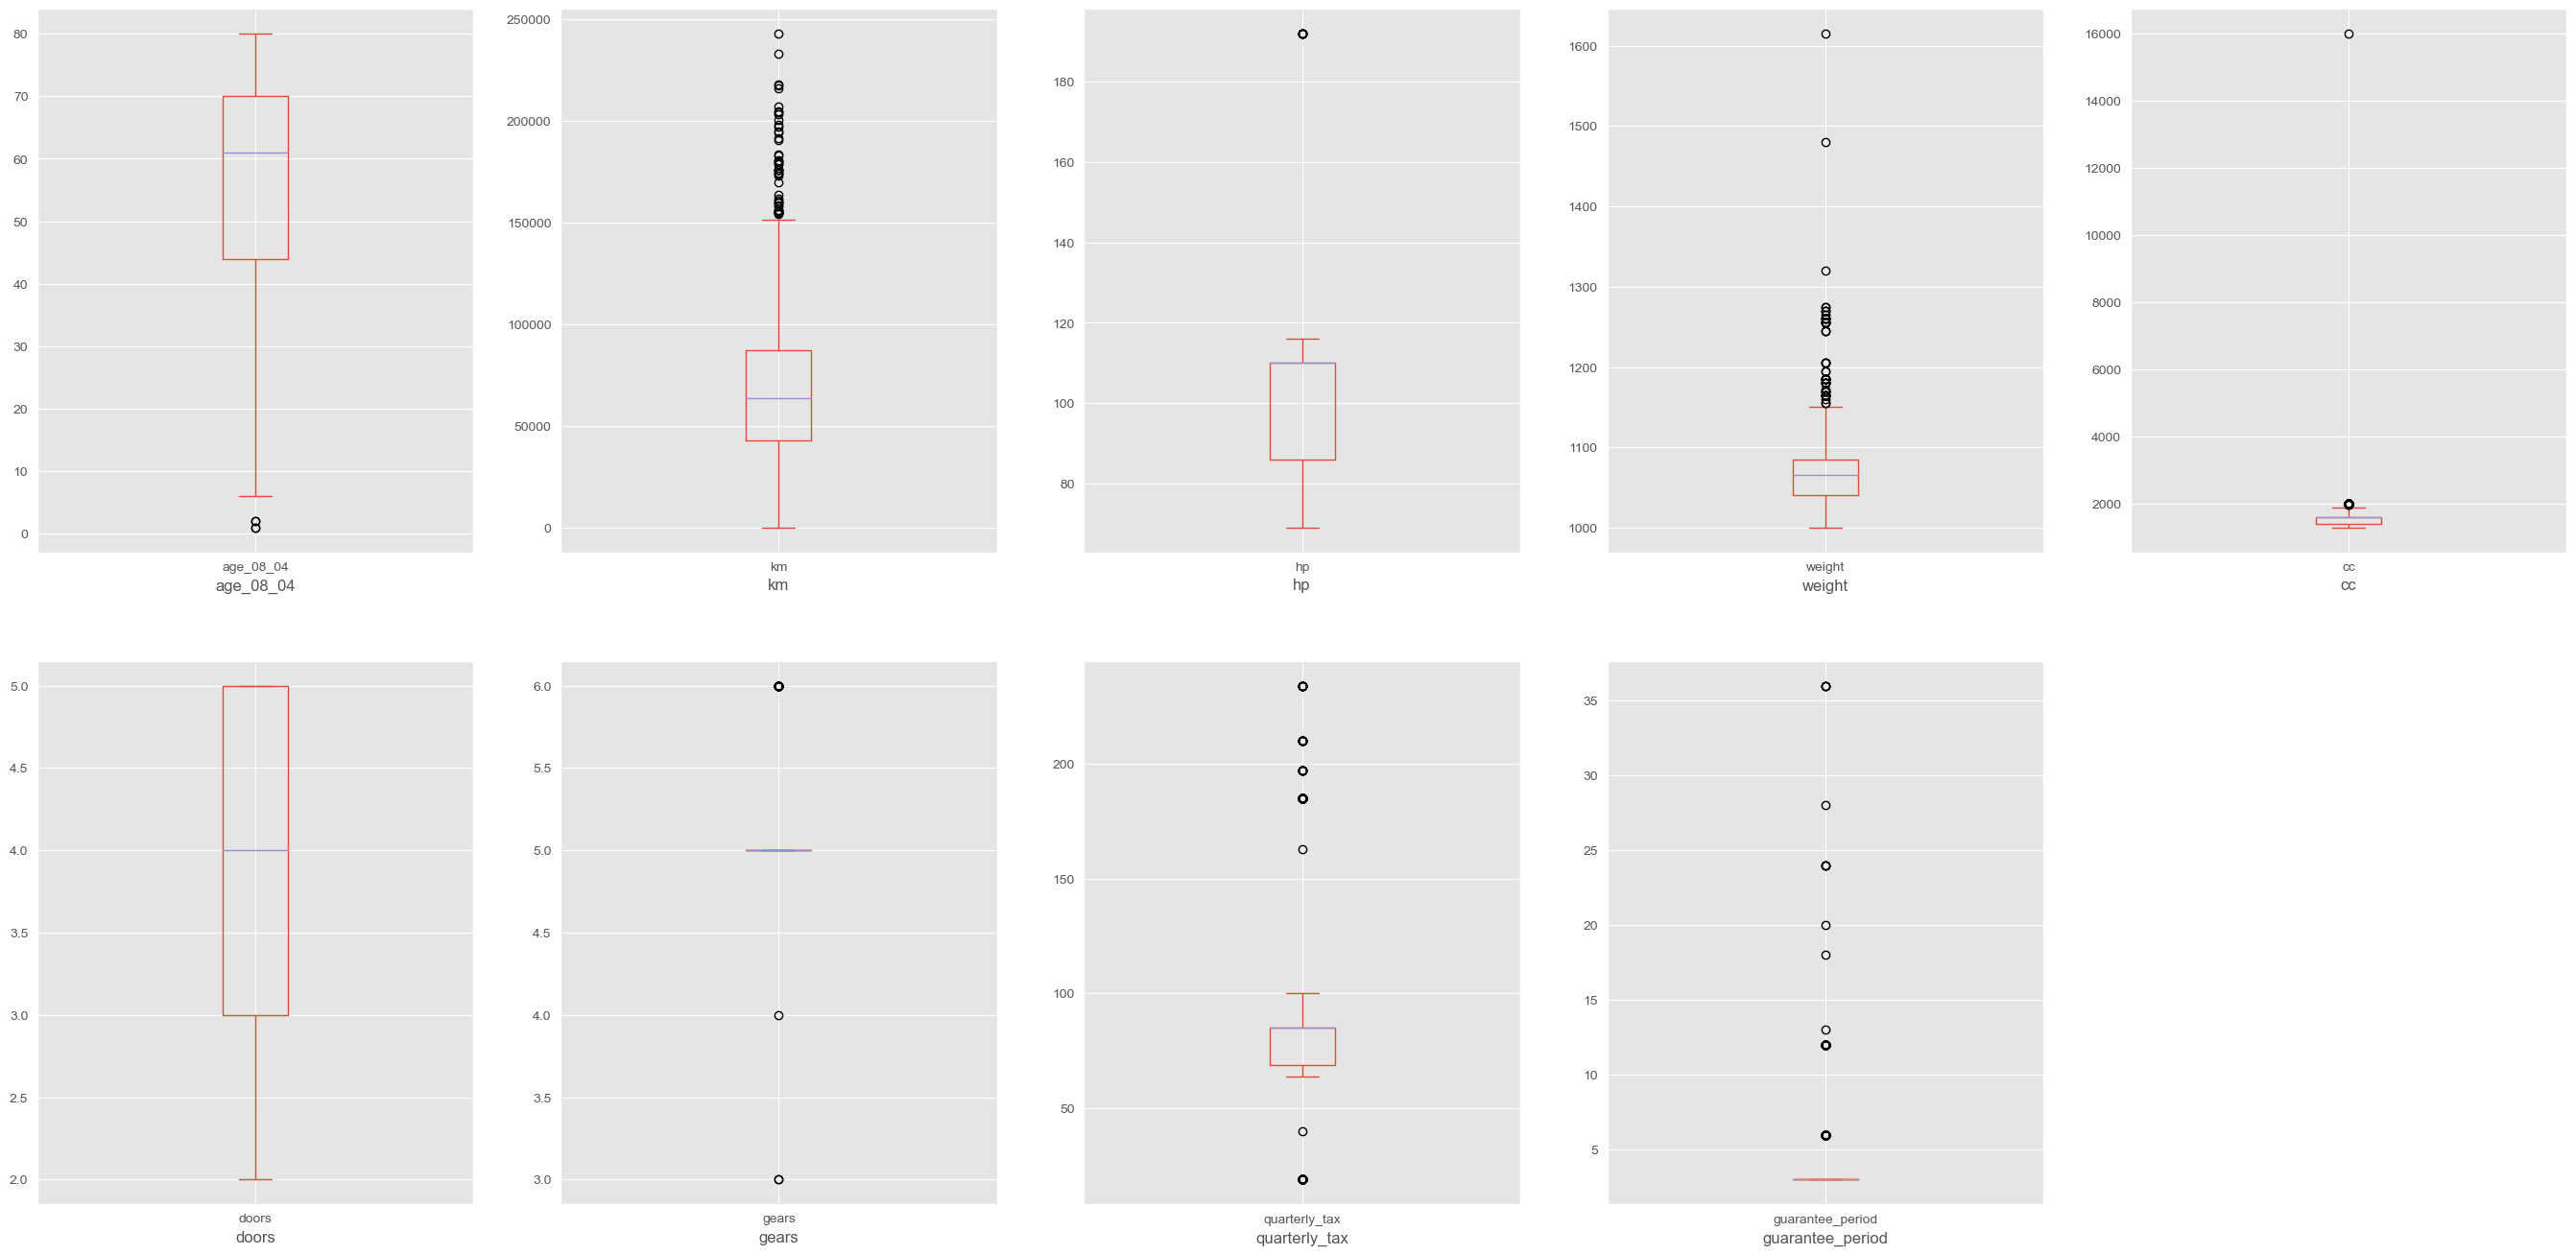

In [1112]:
boxplots = ['age_08_04','km','hp','weight','cc', 'doors', 'gears', 'quarterly_tax', 'guarantee_period']
fig = plt.figure(figsize=(34,25))

for i in range(len(boxplots)):
    continuos = boxplots[i]

    ax1 = fig.add_subplot(3,5,i+1)
    ax1.set_xlabel(continuos)

    df24[continuos].plot(kind='box')

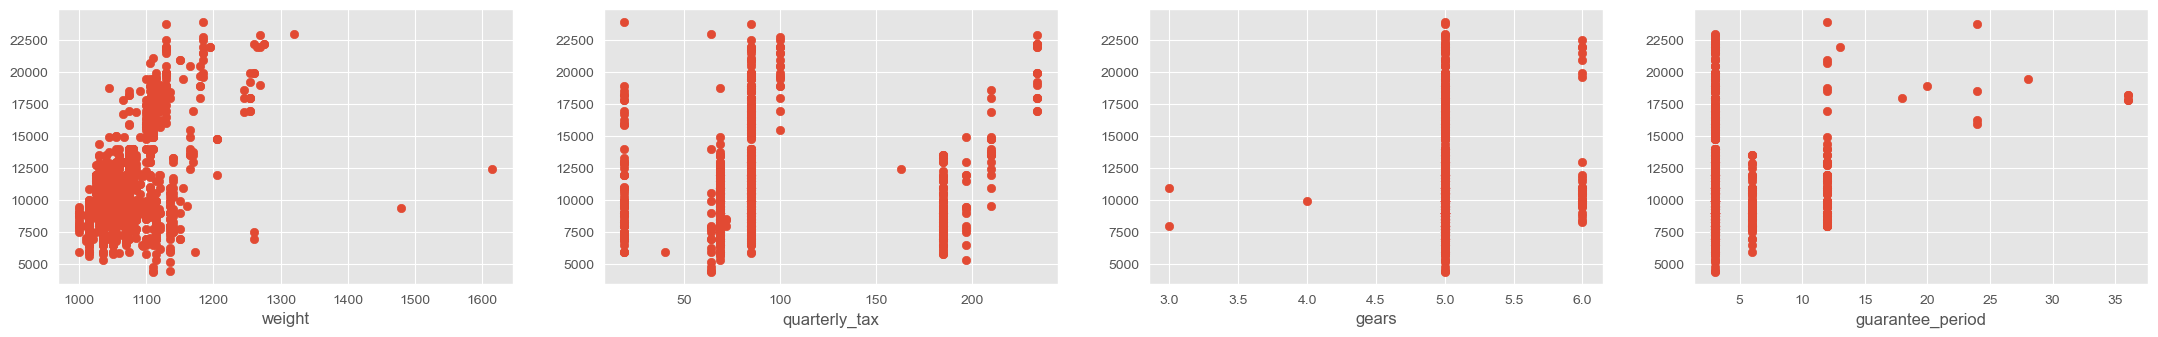

In [1113]:
variables_continuas_scatter = ['weight','quarterly_tax', 'gears', 'guarantee_period']

fig = plt.figure(figsize=(34,25))

for i in range(len(variables_continuas_scatter)):
    aux = variables_continuas_scatter[i]

    ax1 = fig.add_subplot(6,5,i+1)
    ax1.set_xlabel(aux)

    plt.scatter(df[aux],df.price)

In [1114]:
cantidad_registros = df[df['hp'] == 192].shape[0]

print(f"La cantidad de registros con 'hp' igual a 192 es: {cantidad_registros}")

La cantidad de registros con 'hp' igual a 192 es: 11


In [1115]:
df = df[df['hp'] < 192]

In [1116]:
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (1418, 35)


In [1117]:
cantidad_registros = df[df['weight'] > 1400].shape[0]

print(f"La cantidad de registros con 'weight' mayor a 1400 es: {cantidad_registros}")

La cantidad de registros con 'weight' mayor a 1400 es: 2


In [1118]:
df = df[df['weight'] <= 1400]

In [1119]:
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (1416, 35)


<Axes: xlabel='gears'>

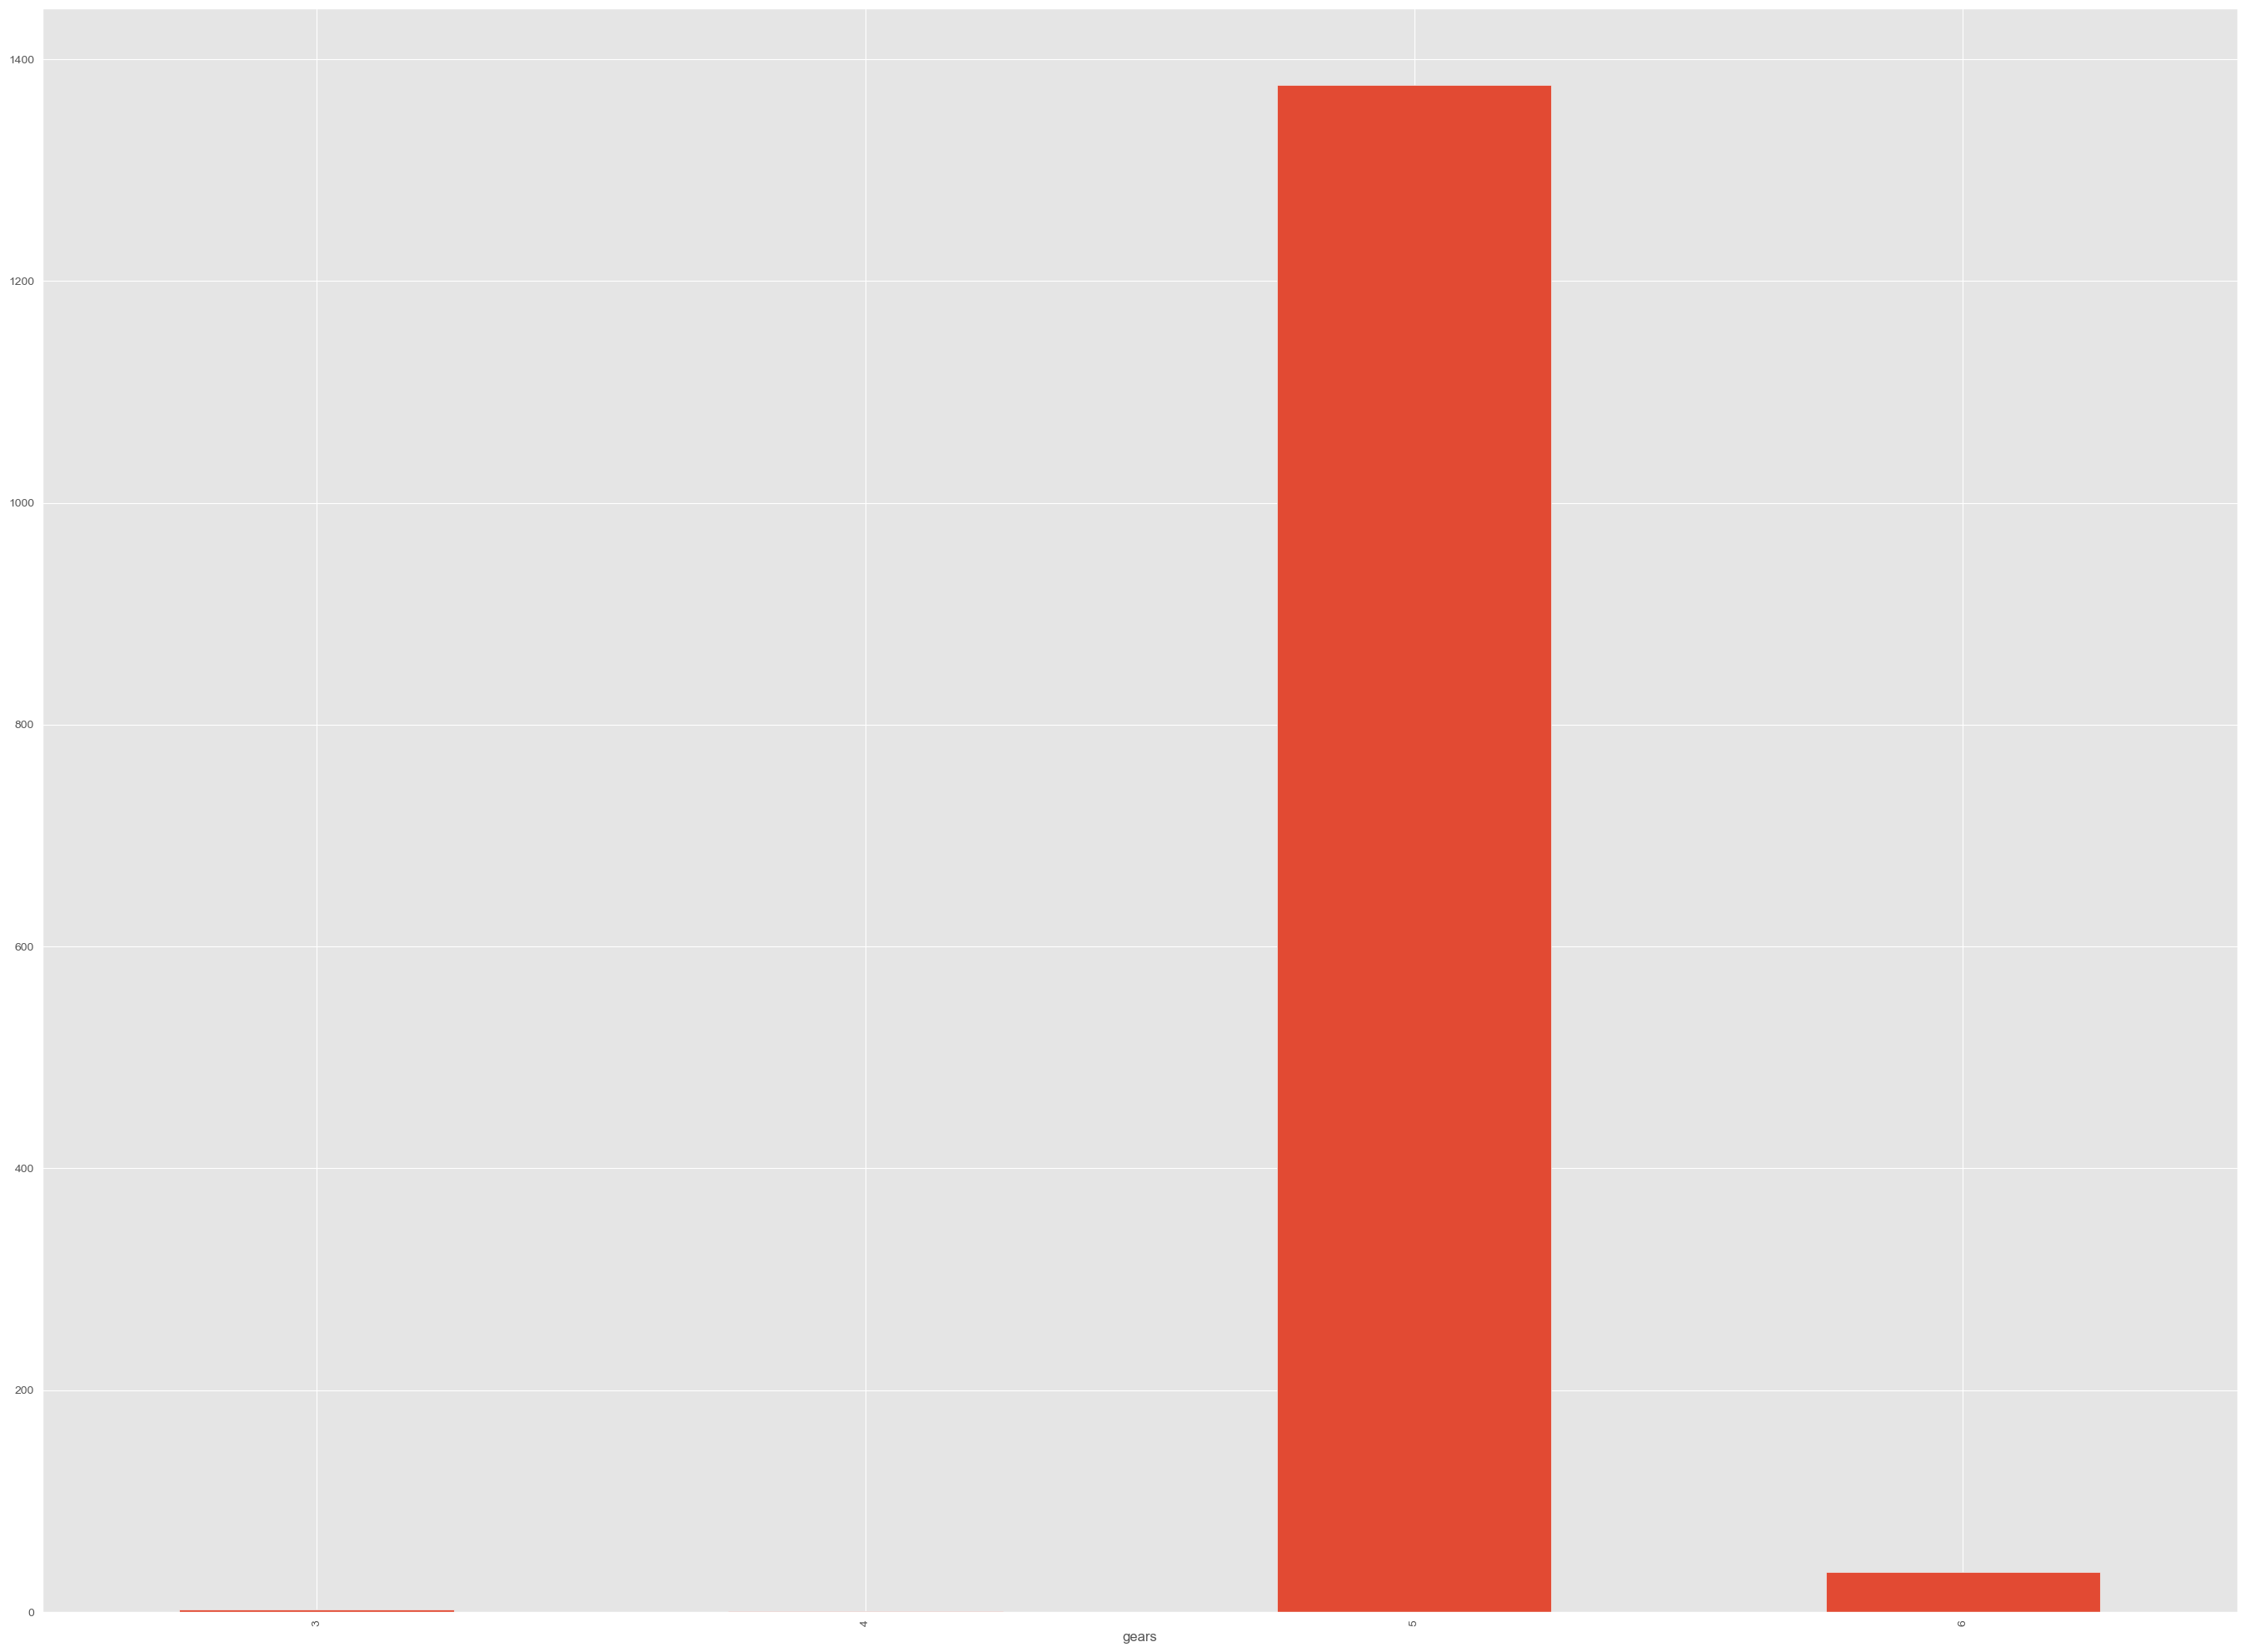

In [1120]:
fig = plt.figure(figsize=(34,25))
ax1.set_xlabel('gears')
df.groupby('gears').size().plot(kind='bar')

In [1121]:
cantidad_registros1 = df[df['gears'] == 6].shape[0]
cantidad_registros2 = df[df['gears'] < 4.5].shape[0]

print(f"La cantidad de registros con 'gears' igual a 6 es: {cantidad_registros1}")
print(f"La cantidad de registros con 'gears' menor a 4.5 es: {cantidad_registros2}")

La cantidad de registros con 'gears' igual a 6 es: 36
La cantidad de registros con 'gears' menor a 4.5 es: 3


In [1122]:
df = df[df['gears'] > 4]

In [1123]:
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (1413, 35)


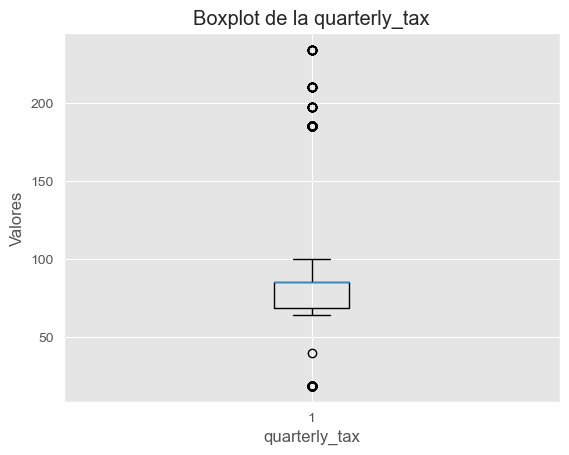

In [1124]:
#fig = plt.figure(figsize=(34,25))
#ax1.set_xlabel('quarterly_tax')
#df['quarterly_tax'].plot(kind='box')

plt.boxplot(df['quarterly_tax'])
# Añadir etiquetas y título
plt.xlabel('quarterly_tax')
plt.ylabel('Valores')
plt.title('Boxplot de la quarterly_tax')

# Mostrar el boxplot
plt.show()

In [1125]:
cantidad_registros1 = df[df['quarterly_tax'] > 150].shape[0]
cantidad_registros2 = df[df['quarterly_tax'] < 50].shape[0]

print(f"La cantidad de registros con 'quarterly_tax' mayor a 150 es: {cantidad_registros1}")
print(f"La cantidad de registros con 'quarterly_tax' menor a 50 es: {cantidad_registros2}")

La cantidad de registros con 'quarterly_tax' mayor a 150 es: 144
La cantidad de registros con 'quarterly_tax' menor a 50 es: 71


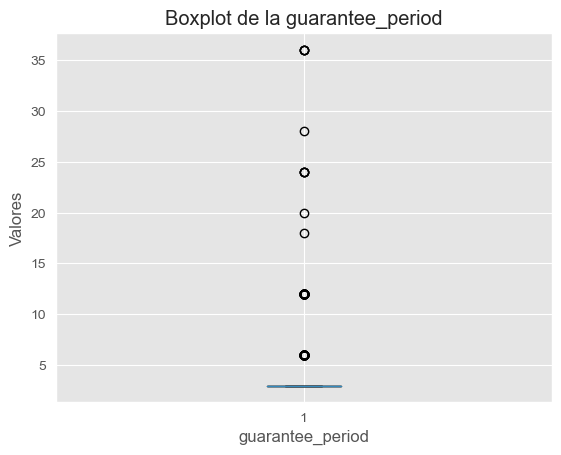

In [1126]:
plt.boxplot(df['guarantee_period'])
# Añadir etiquetas y título
plt.xlabel('guarantee_period')
plt.ylabel('Valores')
plt.title('Boxplot de la guarantee_period')

# Mostrar el boxplot
plt.show()

In [1127]:
cantidad_registros1 = df[df['guarantee_period'] > 35].shape[0]

print(f"La cantidad de registros con 'guarantee_period' mayor a 5 es: {cantidad_registros1}")

La cantidad de registros con 'guarantee_period' mayor a 5 es: 4


In [1128]:
df = df[df['guarantee_period'] < 35]

In [1129]:
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (1409, 35)


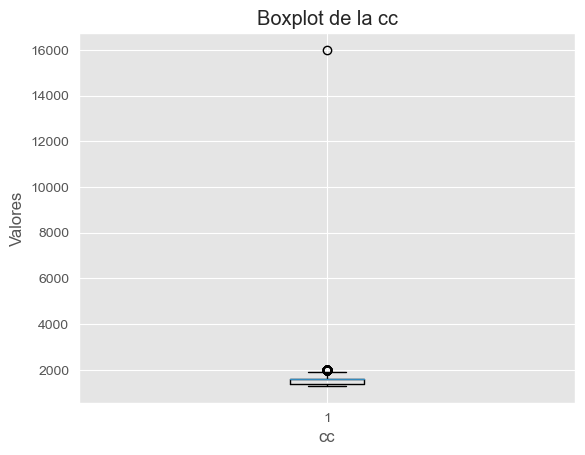

In [1130]:
plt.boxplot(df['cc'])
# Añadir etiquetas y título
plt.xlabel('cc')
plt.ylabel('Valores')
plt.title('Boxplot de la cc')

# Mostrar el boxplot
plt.show()

In [1131]:
df.loc[df['cc'] == 16000, 'cc'] = 1600

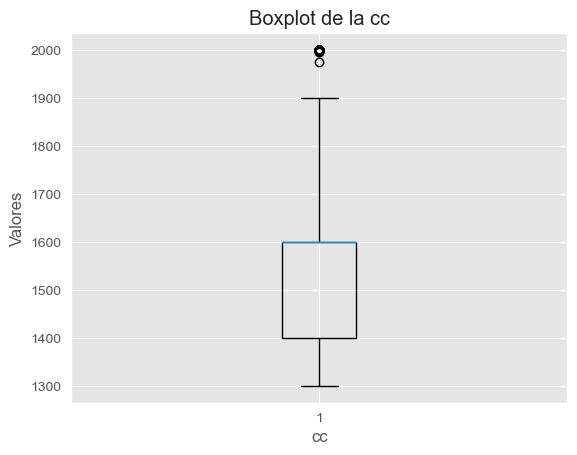

In [1132]:
plt.boxplot(df['cc'])
# Añadir etiquetas y título
plt.xlabel('cc')
plt.ylabel('Valores')
plt.title('Boxplot de la cc')

# Mostrar el boxplot
plt.show()

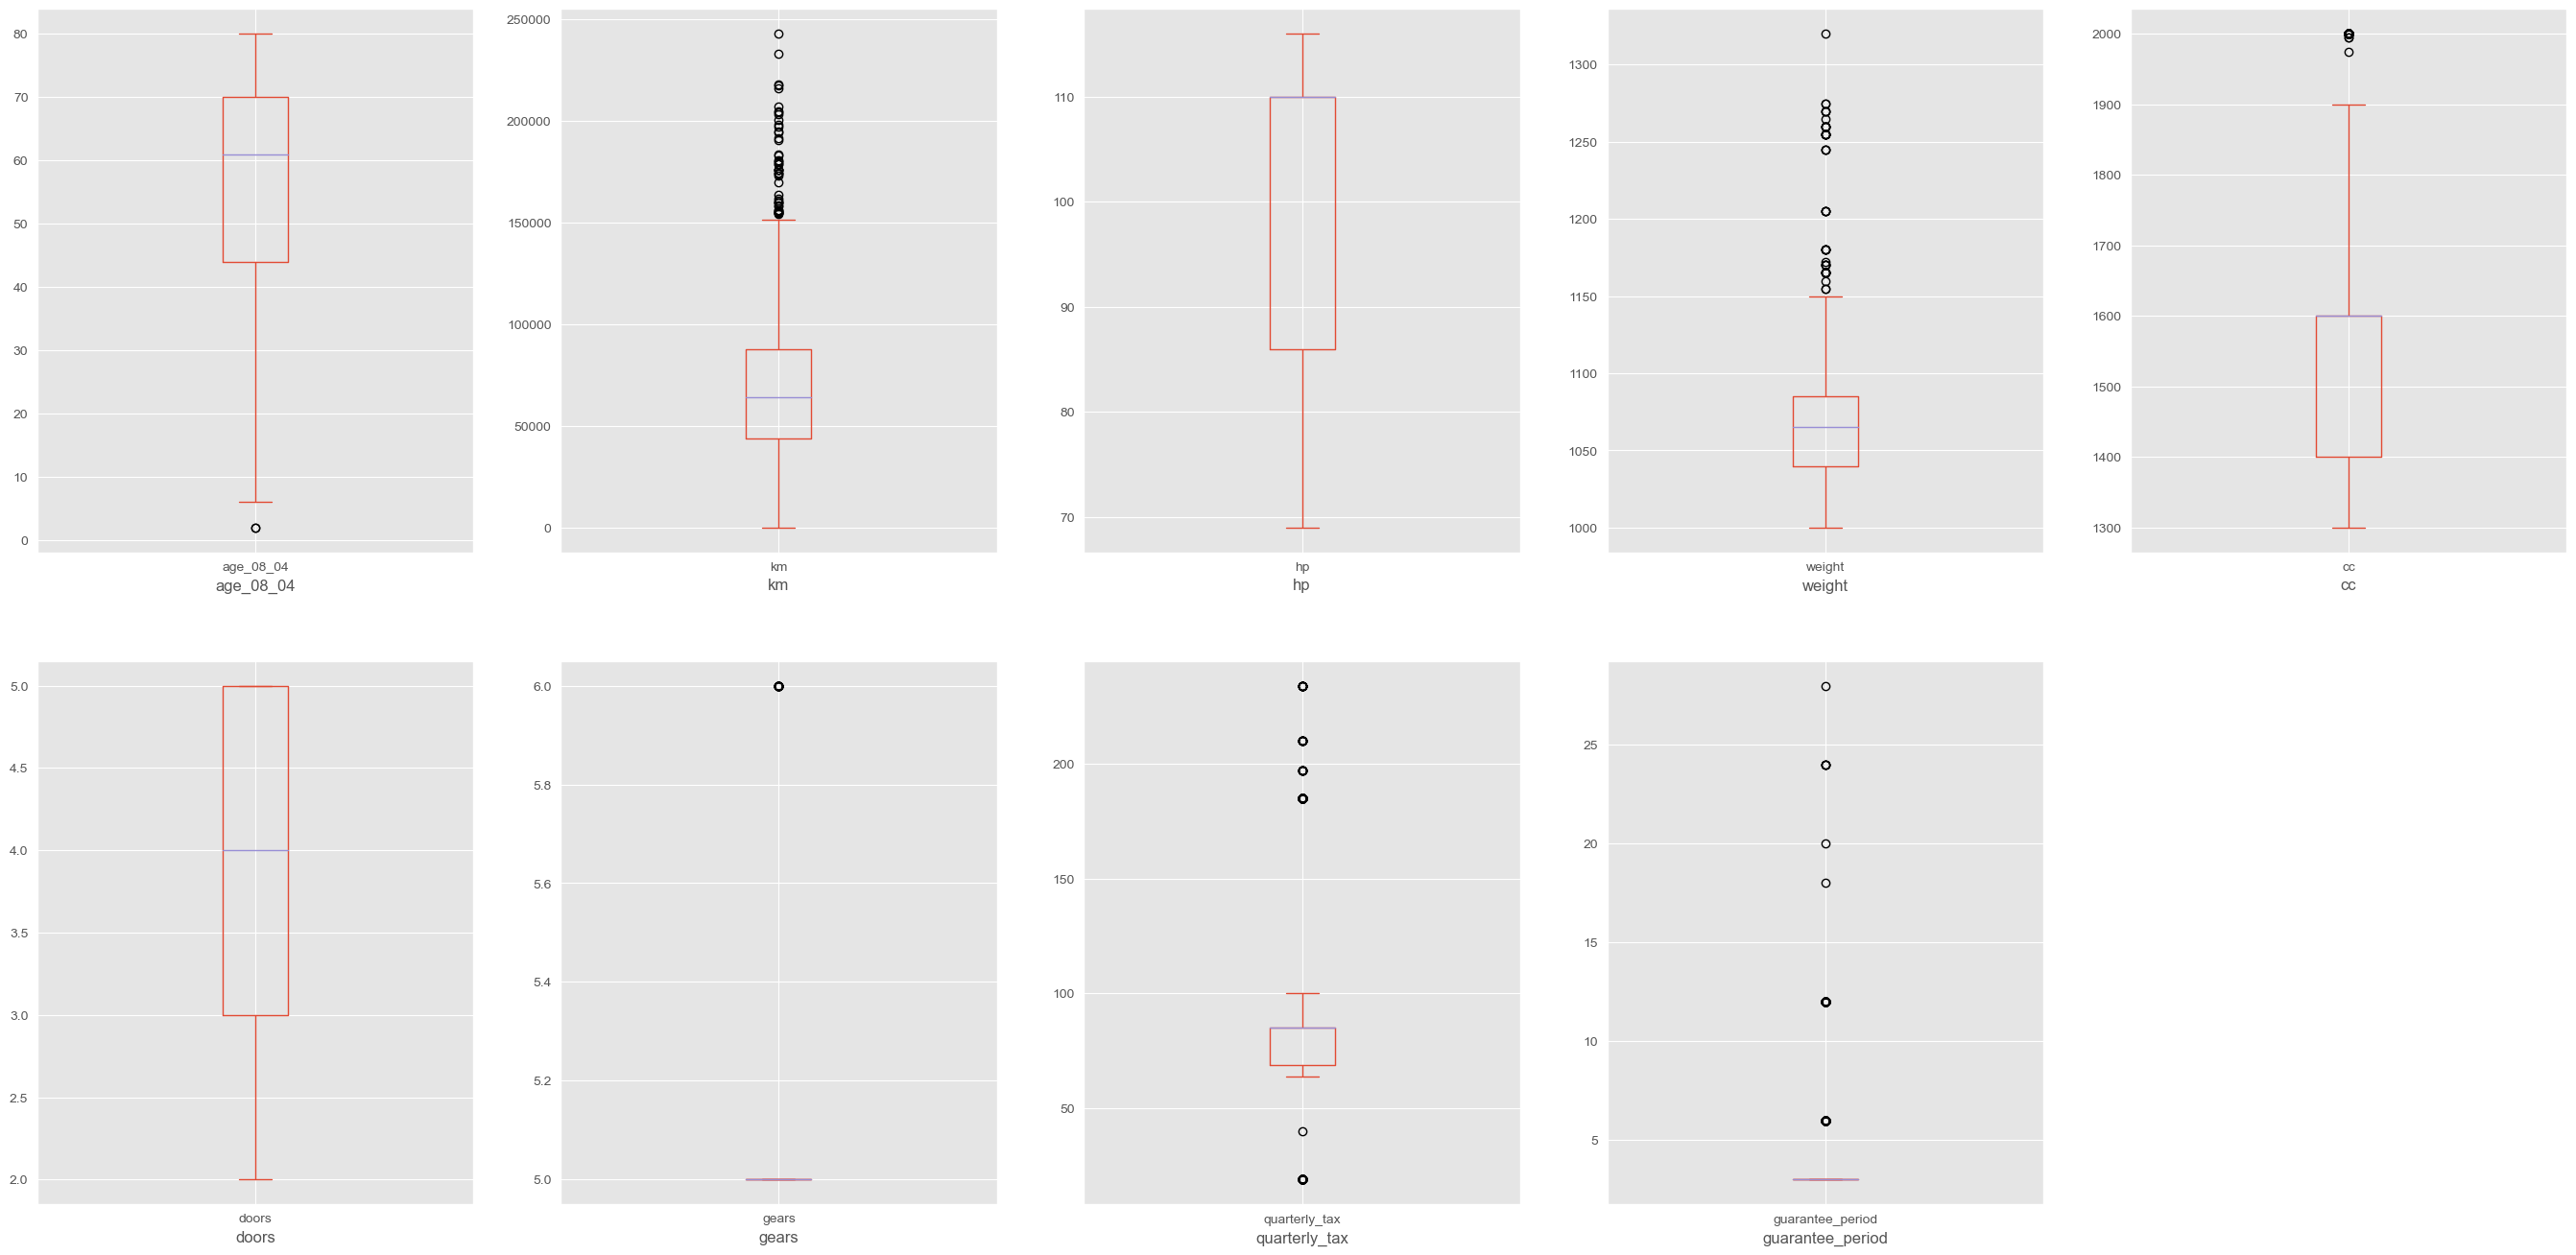

In [1133]:
boxplots = ['age_08_04','km','hp','weight','cc', 'doors', 'gears', 'quarterly_tax', 'guarantee_period']
fig = plt.figure(figsize=(34,25))

for i in range(len(boxplots)):
    continuos = boxplots[i]

    ax1 = fig.add_subplot(3,5,i+1)
    ax1.set_xlabel(continuos)

    df[continuos].plot(kind='box')

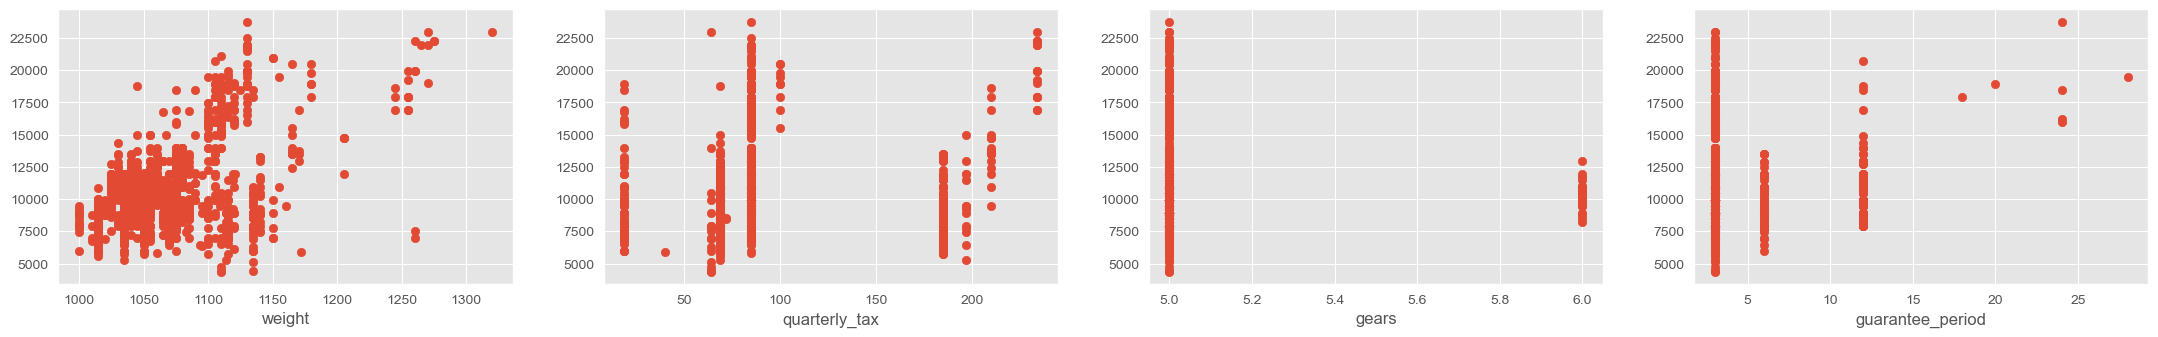

In [1134]:
variables_continuas_scatter = ['weight','quarterly_tax', 'gears', 'guarantee_period']

fig = plt.figure(figsize=(34,25))

for i in range(len(variables_continuas_scatter)):
    aux = variables_continuas_scatter[i]

    ax1 = fig.add_subplot(6,5,i+1)
    ax1.set_xlabel(aux)

    plt.scatter(df[aux],df.price)

Vemos las dimensiones del dataset luego de la limpieza de outliers

In [1135]:
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (1409, 35)


# Modelo 1

In [1136]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['price'], axis=1), df.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((845, 34), (564, 34), (845,), (564,))

In [1137]:
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     250.2
Date:                Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:02:19   Log-Likelihood:                -7042.5
No. Observations:                 845   AIC:                         1.415e+04
Df Residuals:                     811   BIC:                         1.431e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0104      0.001  

In [1138]:
#Calculamos RMSE (error cuadratico medio)
y_pred = model.predict(sm.add_constant(x_test))
RMSE = mean_squared_error(y_test,y_pred, squared = 'false')

In [1139]:
dw = round(sm.stats.stattools.durbin_watson(model.resid), 3)
kurtosis = model.resid.kurtosis()
skew = model.resid.skew()
f_statistic = model.fvalue

In [1140]:
with mlflow.start_run(run_name="Limpieza de outliers con el df elegido anteriormente"):
    #mlflow.log_metric("accuracy", accuracy)
    mlflow.log_params({"R2": model.rsquared, "R2-Ajustado": model.rsquared_adj, "Skew": skew, "Kurtosis": kurtosis, "Durbin-Watson": dw, "MSE - RMSE": RMSE,"F_Statistic": f_statistic})
    mlflow.sklearn.log_model(model, "modelo 1")

# Análisis de la regresión y decisión sobre las variables

In [1141]:
# met_color -> t = 0.605 y P>|t| = 0.546
# Falta de significancia estadística: El valor "t" se utiliza para evaluar si el coeficiente es estadísticamente
# diferente de cero. En este caso, un valor "t" de 0.605 sugiere que el coeficiente no es muy diferente de cero.
# Si el valor "t" es cercano a cero, esto indica que la variable independiente correspondiente puede no estar
# contribuyendo significativamente a la predicción del resultado. Esto podría sugerir que la variable no es relevante
# en el modelo y podría eliminarse.

# Alto valor p: El valor "P>|t|" se utiliza para evaluar si el coeficiente es estadísticamente significativo.
# Un valor p alto, como 0.546, sugiere que no hay suficiente evidencia para rechazar la hipótesis nula de que el
# coeficiente es igual a cero. En otras palabras, la variable independiente no tiene un efecto estadísticamente
# significativo en el resultado. Un valor p alto es una indicación de que la variable podría no ser importante en el
# modelo.


# Variable         t value     P>|t| value
#hp                 0.229      0.819
#met_color          0.802      0.423
#automatic          0.559      0.576
#cc                -1.280      0.201
#gears             -0.519      0.604
#abs               -1.222      0.222
#airbag_1          -0.107      0.915
#airbag_2          -0.320      0.749
#central_lock       0.173      0.863
#power_steering    -1.470      0.142
#mistlamps         -0.444      0.657
#sport_model        1.253      0.210
#backseat_divider  -1.410      0.159
#metallic_rim       1.235      0.217
#tow_bar           -1.183      0.237
#ft__Diesel         0.341      0.733

#Tambien eliminamos las variables mfg_month y mfg_year porque age_08_04 nos proveé la antiguedad del vehiculo y tener los años y meses de manufactura es redundante,
# ademas el t value de age es mucho mayor (-23.935), por lo tanto decidimos quedarnos con age.

# Comienzo nuevo modelo - MODELO 2

In [1142]:
columns_to_delete = ['hp', 'met_color', 'automatic','cc', 'gears', 'abs', 'airbag_1', 'airbag_2', 'central_lock',
                     'power_steering', 'mistlamps', 'sport_model', 'backseat_divider', 'metallic_rim', 'tow_bar', 'ft__Diesel', 'mfg_month', 'mfg_year']
df2 = df.drop(columns=columns_to_delete, axis=1)
df2 = pd.DataFrame(df2)

In [1143]:
x_train, x_test, y_train, y_test = train_test_split(df2.drop(['price'], axis=1), df2.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((845, 16), (564, 16), (845,), (564,))

In [1144]:
#Segunda ejecución de una regresión con todas las variables.
model2 = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     460.4
Date:                Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:02:22   Log-Likelihood:                -7094.2
No. Observations:                 845   AIC:                         1.422e+04
Df Residuals:                     828   BIC:                         1.430e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9222.8450   1809.192  

In [1145]:
#Calculamos RMSE (error cuadratico medio)
y_pred = model2.predict(sm.add_constant(x_test))
RMSE = mean_squared_error(y_test,y_pred,squared = 'false')

In [1146]:
dw = round(sm.stats.stattools.durbin_watson(model2.resid), 3)
kurtosis = model2.resid.kurtosis()
skew = model2.resid.skew()
f_statistic = model2.fvalue

In [1147]:
with mlflow.start_run(run_name="Primer analisis de las variables de regresion y eliminacion de 18 variables - Segundo Modelo"):
  #mlflow.log_metric("accuracy", accuracy)
  mlflow.log_params({"R2": model2.rsquared, "R2-Ajustado": model2.rsquared_adj, "Skew": skew, "Kurtosis": kurtosis, "Durbin-Watson": dw, "MSE - RMSE": RMSE, "F_Statistic": f_statistic})

  mlflow.sklearn.log_model(model, "modelo 2")

In [1148]:
#Siguiendo esta linea las variables a eliminar son:
# Los t value de 2,XX que a su vez poseian un P value malo.

# Variable          t value     P>|t| value
#doors              2.233      0.026     
#airco               2.216      0.027
#cd_player           2.871      0.004
#radio               1.654      0.098
#radio_cassette     -1.859      0.063 

# Comienzo nuevo modelo - MODELO 3

In [1149]:
columns_to_delete = ['doors', 'airco', 'cd_player', 'radio', 'radio_cassette']
df3 = df2.drop(columns=columns_to_delete, axis=1)
df3 = pd.DataFrame(df3)

In [1150]:
x_train, x_test, y_train, y_test = train_test_split(df3.drop(['price'], axis=1), df3.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((845, 11), (564, 11), (845,), (564,))

In [1151]:
#Tercera ejecución de una regresión con todas las variables.
model3 = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     652.9
Date:                Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:02:26   Log-Likelihood:                -7106.0
No. Observations:                 845   AIC:                         1.424e+04
Df Residuals:                     833   BIC:                         1.429e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7962.4236   1711.397  

In [1152]:
#Calculamos RMSE (error cuadratico medio)
y_pred = model3.predict(sm.add_constant(x_test))
RMSE = mean_squared_error(y_test,y_pred, squared = 'false')

In [1153]:
dw = round(sm.stats.stattools.durbin_watson(model3.resid), 3)
kurtosis = model3.resid.kurtosis()
skew = model3.resid.skew()
f_statistic = model3.fvalue

In [1154]:
with mlflow.start_run(run_name="Eliminacion de 5 variables más - Tercer modelo"):
  #mlflow.log_metric("accuracy", accuracy)
  mlflow.log_params({"R2": model3.rsquared, "R2-Ajustado": model3.rsquared_adj, "Skew": skew, "Kurtosis": kurtosis, "Durbin-Watson": dw, "MSE - RMSE": RMSE, "F_Statistic": f_statistic})

  mlflow.sklearn.log_model(model, "modelo 3")

# Comienzo nuevo modelo - MODELO 4

In [1155]:
columns_to_delete = ['boardcomputer']
df4 = df3.drop(columns=columns_to_delete, axis=1)
df4 = pd.DataFrame(df4)

In [1156]:
x_train, x_test, y_train, y_test = train_test_split(df4.drop(['price'], axis=1), df4.price, **split_param)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((845, 10), (564, 10), (845,), (564,))

In [1157]:
#Tercera ejecución de una regresión con todas las variables.
model4 = sm.OLS(y_train, sm.add_constant(x_train)).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     715.3
Date:                Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:02:30   Log-Likelihood:                -7108.0
No. Observations:                 845   AIC:                         1.424e+04
Df Residuals:                     834   BIC:                         1.429e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -8264.6591   1707.424  

In [1158]:
#Calculamos RMSE (error cuadratico medio)
y_pred = model4.predict(sm.add_constant(x_test))
RMSE = mean_squared_error(y_test,y_pred, squared = 'false')

In [1159]:
dw = round(sm.stats.stattools.durbin_watson(model4.resid), 3)
kurtosis = model4.resid.kurtosis()
skew = model4.resid.skew()
f_statistic = model4.fvalue

In [1160]:
with mlflow.start_run(run_name="Eliminacion de 1 variable más - Cuarto modelo"):
    #mlflow.log_metric("accuracy", accuracy)
    mlflow.log_params({"R2": model4.rsquared, "R2-Ajustado": model4.rsquared_adj, "Skew": skew, "Kurtosis": kurtosis, "Durbin-Watson": dw, "MSE - RMSE": RMSE, "F_Statistic": f_statistic})

    mlflow.sklearn.log_model(model, "modelo 3")

<Axes: title={'center': 'Mapa de Correlaciones'}>

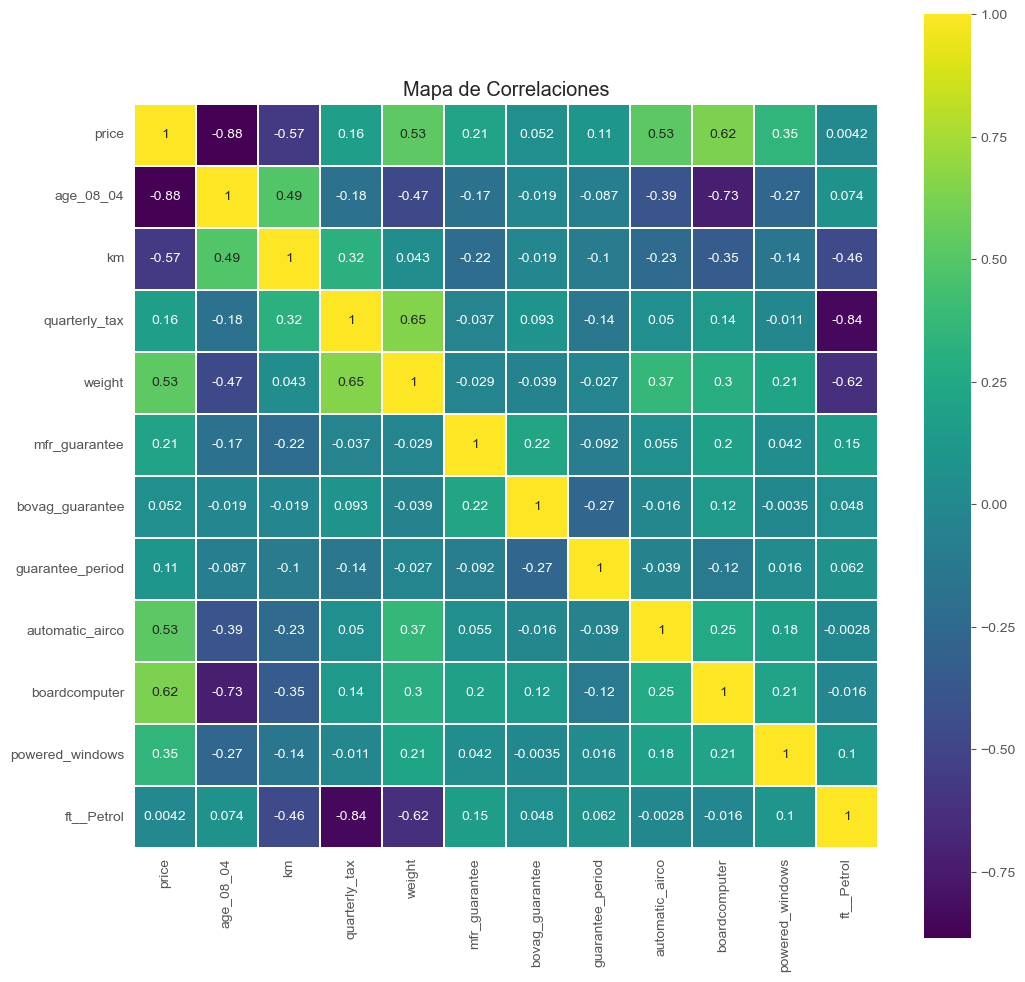

In [1161]:
plt.figure(figsize=(12,12))
plt.title("Mapa de Correlaciones")
corr = df3.corr(method="pearson")
sns.heatmap(corr, annot=True, cmap=plt.cm.viridis, linewidths=0.1, linecolor="white", square=True)